In [3]:
import numpy as np
from numpy import sqrt, cos, sin
import matplotlib
import matplotlib.pyplot as plt

# Motions and the deformation gradient 

This python notebook is going to illustrate some of the basic concepts related to the concepts of motion and deformation gradient. I would like to emphasize that the deformation gradient $\mathbf{F}$ is the main geometric object in solid mechanics, so play close attention!  

First, we define a deformation map or motion $\mathbf{x}=\mathbf{\varphi}(\mathbf{X},t)$, in this notebook we actually ignore the dependence on time and focus only on two configurations $\mathbf{X}$ the reference configuration and $\mathbf{x}$ the deformed configuration. In this notebook we will have an analytical expression for $\mathbf{\varphi}$, but in the future when we introduce the finite element discretization we will be able to compute a map $\mathbf{\varphi}$ based on the value of the displacement at the nodes and some suitable shape functions. 

Given the map $\mathbf{\varphi}$ we can compute the deformation gradient $\mathbf{F}=\nabla_{X} \mathbf{\varphi}$. Again, here, since we have an analytical expression for $\mathbf{\varphi}$ we can calculate the gradient analytically. In the future, we will compute the deformation gradient when the displacement is available only at the nodes of the finite element mesh. 

Finally, having computed $\mathbf{F}$ we can compute local geometry changes such as changes in length, area and volume. One thing to pay attention to in this notebook is that $\mathbf{F}$ is a local change, it is valid within a small differential volume element around some point $\mathbf{X}$. To illustrate this, the plots will show the domain *chopped* into smaller regions, and contour plots will be used to illustrate how the deformation changes across the domain. 

### Reference configuration 

Consider a rectangular prism. We will only plot the in plane geometry. 

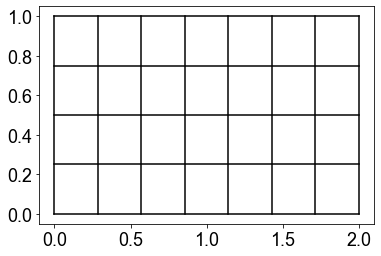

In [4]:
# Consider a rectangular prism with dimensions 2x1x1 units in the standard cartesian basis with a standard orthonormal basis.
# plot just to get an idea, only plot the XY plane 
npx1 = 100
npx2 = 50
lineX1 = np.linspace(0,2,npx1)
lineX2 = np.linspace(0,1,npx2)

font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)

# plot a grid 
nlx1 = 5
nlx2 = 8
for i in range(nlx1):
    X2i = i/(nlx1-1.0)*1.0 
    plt.plot(lineX1,X2i*np.ones(npx1),color='black')
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*2.0 
    plt.plot(X1i*np.ones(npx2),lineX2,color='black')

### The deformation map or motion

Consider the deformation map defined by

$x_1 = \varphi_1(\mathbf{X}) = X_2\, \sin(\alpha X_1) + \frac{1}{\alpha} \sin(\alpha X_1)$ 

$x_1 = \varphi_2(\mathbf{X}) = X_2\, \cos(\alpha X_1) + \frac{1}{\alpha} \cos(\alpha X_1)$ 

$x_3 = \varphi_3(\mathbf{X}) = X3$ 

Note how this function takes points in the reference configuration $\mathbf{X}$ and gives us where these points move with the motion, to the new location $\mathbf{x}$. As such, we can evaluate the function at every single point $\mathbf{X}$. Ok, that would be infinitely many points, so below we will only compute the function for a grid of points, the same points we used to plot the reference grid above. 

In [5]:
# We will apply the following deformation map 

def Phi(X,alpha=1):
    # note the only required argument is X, the alpha is a parameter in case you want to see different
    # deformation as you change alpha 
    x = np.zeros(X.shape)
    x[0] = X[1]*sin(alpha*X[0])+(1./alpha)*sin(alpha*X[0])
    x[1] = X[1]*cos(alpha*X[0])+(1./alpha)*cos(alpha*X[0])
    x[2] = X[2]
    
    return  x

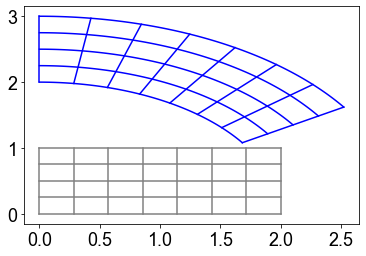

In [52]:
# plot the reference and deformed grids 
nlx1 = 5
nlx2 = 8
npx1 = 100
npx2 = 50
lineX1 = np.linspace(0,2,npx1)
lineX2 = np.linspace(0,1,npx2)
# this for loop is to plot the grid lines which initially are horizontal 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    plt.plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    plt.plot(xvec[0],xvec[1],color='blue')
# this for loop is to plot the grid lines which initially are vertical 
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*2.0 
    plt.plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    plt.plot(xvec[0],xvec[1],color='blue')

In the above plot you can see how we have plotted again the reference grid, i.e. a subset of points $\mathbf{X}$ that are in the reference, gray geometry. For these points we have computed the function $\mathbf{x}=\mathbf{\varphi}(\mathbf{X})$ and we have plotted them in blue. You can see that this motion translates and bends the initial rectangular prism .

### Activity 

* Consider a new motion given by $\mathbf{\varphi}(\mathbf{X}) = \mathbf{Q}\mathbf{X} + \mathbf{P}$ where $\mathbf{Q}$ is a rotation around the $z$ axis, and the vector $\mathbf{P}=[1,1,0]^T$. Apply this deformation to unit cube, i.e. of dimensions $1\times 1\times 1$. Note that in this notebook we are going to assume that the basis is the standard Cartesian basis, i.e. orthonormal basis $\mathbf{e}_i$. We are not going to change basis at all so no need to specify the basis unless strictly necessary. For the rotation tensor, you can find the definition in many places, for example the [Wikipedia](https://en.wikipedia.org/wiki/Rotation_matrix). One way of defining the rotation matrix that you probably have not seen before is: 

$$
\mathbf{Q} = \cos(\theta)\mathbf{I} + \sin(\theta)\star \mathbf{u} +  (1-\cos(\theta))\mathbf{u}\otimes \mathbf{u}
$$

Where $\mathbf{u}$ is the axis of rotation, and $\theta$ is the angle of rotation. Almost all elements of the previous equation have been defined except $\star \mathbf{u}$. This is an operation called the *Hodge star* which produces a second order skew-symmetric tensor out of a vector. The operation is defined as 

$$
(\star \mathbf{u})_{ij} = \varepsilon_{ikj} u_k
$$

where $\varepsilon_{ijk}$ is the Levi-Civita symbol, defined in the Python notebook about tensor and vector algebra. The Levi-Civita symbol was actually used to compute the cross product in that notebook. For the rotation around the $z$ axis then $\mathbf{u}=\mathbf{e}_3=[0,0,1]^T$. Consider an angle of rotation $\theta=\pi/3$ radians. 

* Consider the motion given by 

$$
\begin{aligned}
x_1 &= (1+\alpha) X_1\\
x_2 &= (X_2 - 0.5)(1+X_1^2)+0.5\\
x_3 &= X_3 \\
\end{aligned}
$$

Plot the reference and deformed configurations. Consider again the same unit cube. Consider $\alpha=0.5$ 

In [70]:
## for the first motion in the activity above, let's just define the function first and then follow the code
# as in the example 
def Phi_example_1(X):
    # defining the rotation tensor with the definition above 
    theta = np.pi/3
    e3 = np.array([0,0,1])
    Q = np.cos(theta)*np.eye(3)+np.sin(theta)*hodge_star(e3)+(1-np.cos(theta))*np.outer(e3,e3)
    P = np.array([1,1,0])
    x = np.zeros(X.shape)
    for i in range(x.shape[1]):
        x[:,i] = np.dot(Q,X[:,i])+P
    return x

# note the rotation tensor above requires the Levi Cevita symbol which is defined in this function
def levi_civita_epsilon(i,j,k):
    if i==0 and j==1 and k==2:
        return 1
    elif i==1 and j==2 and k==0:
        return 1
    elif i==2 and j==0 and k==1:
        return 1
    elif i==2 and j==1 and k==0:
        return -1
    elif i==1 and j==0 and k==2:
        return -1
    elif i==0 and j==2 and k==1:
        return -1
    else:
        return 0

# the hodge star operator returns a second order tensor out of a vector 
def hodge_star(u):
    A = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                A[i,j] += levi_civita_epsilon(i,k,j)*u[k]
    return A

(-0.07500000000000001, 1.575, -0.11830127018922194, 2.4843266739736607)

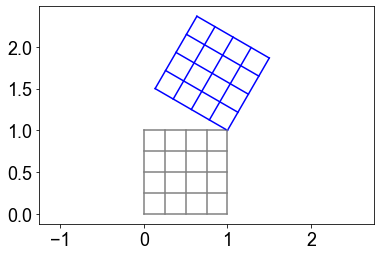

In [72]:
# plot the reference and deformed grids 
nlx1 = 5
nlx2 = 5
npx1 = 50
npx2 = 50
lineX1 = np.linspace(0,1,npx1)
lineX2 = np.linspace(0,1,npx2)

# this for loop is to plot the grid lines which initially are horizontal 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    plt.plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi_example_1(Xvec)
    plt.plot(xvec[0],xvec[1],color='blue')
# this for loop is to plot the grid lines which initially are vertical 
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*1.0 
    plt.plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi_example_1(Xvec)
    plt.plot(xvec[0],xvec[1],color='blue')
plt.axis('equal')

In [48]:
# second example
def Phi_example_2(X):
    # defining the rotation tensor with the definition above 
    x = np.zeros(X.shape)
    x[0,:] = 1.5*X[0,:]
    x[1,:] = (X[1,:]-0.5)*(1+X[0,:]**2)+0.5
    x[2,:] = X[2,:]
    return x

(-0.07500000000000001, 1.575, -0.6, 1.6)

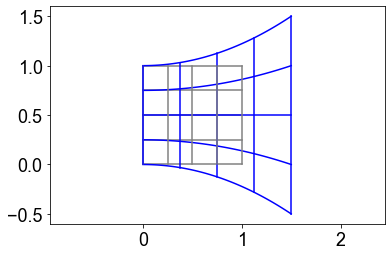

In [50]:
# plot the reference and deformed grids 
nlx1 = 5
nlx2 = 5
npx1 = 50
npx2 = 50
lineX1 = np.linspace(0,1,npx1)
lineX2 = np.linspace(0,1,npx2)

# this for loop is to plot the grid lines which initially are horizontal 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    plt.plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi_example_2(Xvec)
    plt.plot(xvec[0],xvec[1],color='blue')
# this for loop is to plot the grid lines which initially are vertical 
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*1.0 
    plt.plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi_example_2(Xvec)
    plt.plot(xvec[0],xvec[1],color='blue')
plt.axis('equal')

### Deformation gradient

The grey grid lines in the previous sets of plots outline the reference configuration while the blue lines show what happens after we apply the map. 

Next we calculate the deformation gradient. Consider again the first example. Here we have an analytical deformation, so we can compute the gradient (as done in the lecture notes) 

$
\mathbf{F}(\mathbf{X}) = \begin{array}{ccc} (1+\alpha X_2)\cos(\alpha X_1)&\sin(\alpha X_1)&0\\-(1+\alpha X_2)\sin(\alpha X_1)&\cos(\alpha X_1)&0\\0&0&1 \end{array} 
$

This means that we can evaluate the deformation gradient at any point. In particular we will evaluate only at the center of the grid points. The deformation gradient is a second order tensor which, in the standard basis we are using has 9 components. Only the components in the XY plane are interesting, but still, four components are difficult to visualize. One thing we could do is to plot for example only the first component, or only the second component. Instead of plotting the components as a contour we are going to compute changes in length, area and volume. 



In [55]:
def evalF(X,alpha=1):
    F = np.zeros((3,3))
    F[0,0] = (1+alpha*X[1])*cos(alpha*X[0])
    F[0,1] = sin(alpha*X[0])
    F[1,0] = -(1+alpha*X[1])*sin(alpha*X[0])
    F[1,1] = cos(alpha*X[0])
    F[2,2] = 1
    return F

### Changes in length 

Consider the vector $\mathbf{e}_1$, we will associate a copy of $\mathbf{e}_1$ to every point in the domain, in particular, to the grid centers. In reference configuration this looks like the following plot 

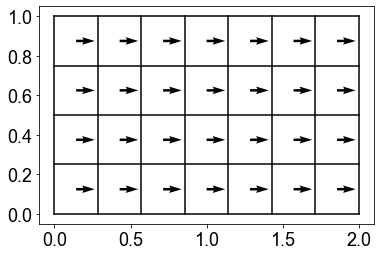

In [56]:
# Plot the grid 
nlx1 = 5
nlx2 = 8
npx1 = 100
npx2 = 50
lineX1 = np.linspace(0,2,npx1)
lineX2 = np.linspace(0,1,npx2)

for i in range(nlx1):
    X2i = i/(nlx1-1.0)*1.0 
    plt.plot(lineX1,X2i*np.ones(npx1),color='black')
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*2.0 
    plt.plot(X1i*np.ones(npx2),lineX2,color='black')

# Plot the arrows e1 at the grid centers 
dx1 = 0.5*2./(nlx2-1)
dx2 = 0.5*1./(nlx1-1)
x1aux = np.linspace(dx1,2-dx1,nlx2-1)
x2aux = np.linspace(dx2,1-dx2,nlx1-1)
X1mg,X2mg = np.meshgrid(x1aux,x2aux)
e11mg = np.ones(X1mg.shape)
e12mg = np.zeros(X1mg.shape)
plt.quiver(X1mg,X2mg,e11mg,e12mg)

Now, we will calcualte the deformed vector at the different grid centers that is the result of locally deforming the geometry near point $\mathbf{X}$ by the deformation gradient $\mathbf{F}$, in other words we will compute the vector field 

$\mathbf{f} = \mathbf{F}\mathbf{e}_1$ 

(-0.12622064772118446, 2.6506336021448735, -0.15000000000000002, 3.15)

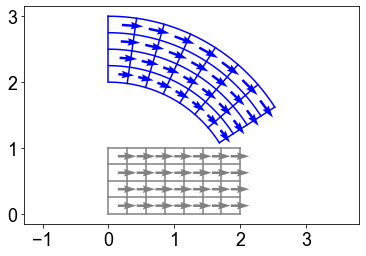

In [60]:
# plot the deformed grid with the deformed arrows 
# plot the reference and deformed grids 
nlx1 = 5
nlx2 = 8
npx1 = 100
npx2 = 50
lineX1 = np.linspace(0,2,npx1)
lineX2 = np.linspace(0,1,npx2)

for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    plt.plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    plt.plot(xvec[0],xvec[1],color='blue')
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*2.0 
    plt.plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    plt.plot(xvec[0],xvec[1],color='blue')
    
# Plot the arrows e1 at the grid centers in the reference
dx1 = 0.5*2./(nlx2-1)
dx2 = 0.5*1./(nlx1-1)
x1aux = np.linspace(dx1,2-dx1,nlx2-1)
x2aux = np.linspace(dx2,1-dx2,nlx1-1)
X1mg,X2mg = np.meshgrid(x1aux,x2aux)
# HERE creating the field of e_1, note e_1 = [1,0], so defining (e_1)_1 =1 and (e_1)_2 =0 
e11mg = np.ones(X1mg.shape)
e12mg = np.zeros(X1mg.shape)
plt.quiver(X1mg,X2mg,e11mg,e12mg,color='grey')
# get the corresponding quiver plot in the deformed points 
x1mg = np.zeros(X1mg.shape)
x2mg = np.zeros(X1mg.shape)
# HERE computing f_1 = Fe_1 , sorry for notation, in the text above I said f = Fe_1 
# but in an example later on I ask for F e_2, so in my solution of the notebook I am using f_1 and f_2
# and each has two components, in other words f_1 is a vector with components (f_1)_1, (f_1)_2
f11mg = np.ones(X1mg.shape)
f12mg = np.zeros(X1mg.shape)
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi(np.array([X1mg[i,j],X2mg[i,j],0]),alpha=0.5)
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # evaluate the deformation gradient at the corresponding points 
        F = evalF(np.array([X1mg[i,j],X2mg[i,j],0]),alpha=0.5)
        # apply the deformation gradient to the vector field e1 
        f = np.dot(F,np.array([1,0,0]))
        f11mg[i,j] = f[0]
        f12mg[i,j] = f[1]
plt.quiver(x1mg,x2mg,f11mg,f12mg,color='blue')
plt.axis('equal')

Note how due to the deformation map which transforms the grey grid to the blue grid, we have an associated deformation gradient field, which allows us to map the grey vectors to the corresponding blue vectors! This is a key concept in the class! 

Now we can actually compute the change in length. You may have notices already that the grey vectors are being rotated and stretched when they get mapped into the blue vectors. We actually would like to quantify how much they are being stretched. For example, we can compute the following ratio 

$$
\lambda = \frac{|\mathbf{F}\mathbf{e}_1|}{|\mathbf{e}_1|} =  \frac{|\mathbf{f}|}{|\mathbf{e}_1|} = |\mathbf{f}|
$$

Since the vector $\mathbf{e}_1$ is a unit vector. Note that we can do the calculations in several ways. For example, we can compute the deformed vector $\mathbf{f}$ and then its norm. Alternatively, we can do things directly with $\mathbf{F}$ and $\mathbf{e}_1$: 

$$
|\mathbf{f}| = \sqrt{ (\mathbf{F}\mathbf{e}_1) \cdot (\mathbf{F}\mathbf{e}_1)} = \sqrt{\mathbf{e}_1\cdot(\mathbf{F}^T\mathbf{F}\mathbf{e}_1)} = \sqrt{\mathbf{e}_1\cdot\mathbf{C}\mathbf{e}_1}
$$

with $\mathbf{C}=\mathbf{F}^T\mathbf{F}$ the right Cauchy Green deformation tensor. In other words, we dont need to compute the vector $\mathbf{f}$ and then its norm, but given $\mathbf{F}$ we can compute $\mathbf{C}$ and use dot products with $\mathbf{e}_1$. Of course the vector $\mathbf{f}$ is hiding in plane sight, but at least in notation there is no need to explicitly write it down and instead express things in terms of $\mathbf{F}$ or $\mathbf{C}$ and vectors in the reference configuration, in this case $\mathbf{e}_1$. 

Note that because $\mathbf{e}_1=[1,0,0]$, then

$$
|\mathbf{f}| = C_{11}
$$

the first entry of the $\mathbf{C}$ tensor. 

Below there is code to plot the scalar field defined by $\lambda=|\mathbf{f}|$. This is a field because the amount of stretching changes from one location to another. We can plot scalar fields with contour plots. Below you will see that I decided to color each square of the grid according to $\lambda$. This is a bit coarse, you can have a continuous contour plot, or at least one with greater resolution, perhaps you can try that on your own. 


In [58]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

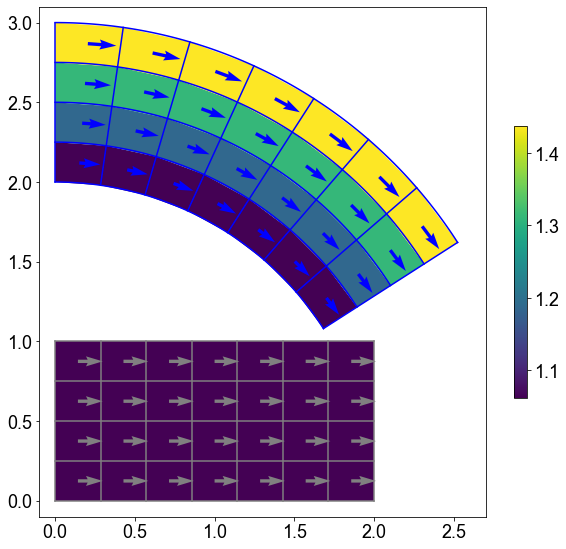

In [59]:
# Color according to change in length 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([-0.1, 2.7])
ax.set_ylim([-0.1, 3.1])
ax.set_aspect('equal')

# Plot the same stuff I had before 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    ax.plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    ax.plot(xvec[0],xvec[1],color='blue')
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*2.0 
    ax.plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    ax.plot(xvec[0],xvec[1],color='blue')
ax.quiver(X1mg,X2mg,e11mg,e12mg,color='grey',zorder=10)
ax.quiver(x1mg,x2mg,f11mg,f12mg,color='blue',zorder=10)

# Loop over grid points and create a quadrilateral for each grid point 
#viridis = matplotlib.cm.get_cmap('viridis', 50)
patchesX = []
colorsX = np.zeros(((nlx1-1)*(nlx2-1)))
patchesx = []
colorsx = np.zeros(((nlx1-1)*(nlx2-1)))
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi(np.array([X1mg[i,j],X2mg[i,j],0]),alpha=0.5)
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # but now we also want the quadrilateral around this grid point 
        quad_coord = np.array([[-1,-1],[1,-1],[1,1],[-1,1]])
        Xquad = np.zeros((4,2))
        xquad = np.zeros((4,2))
        for k in range(4):
            Xquad[k,0] = X1mg[i,j] +quad_coord[k,0]*dx1
            Xquad[k,1] = X2mg[i,j] +quad_coord[k,1]*dx2
            aux = Phi(np.array([Xquad[k,0],Xquad[k,1],0]),alpha=0.5)
            xquad[k,0] = aux[0]
            xquad[k,1] = aux[1]
        polygon = Polygon(Xquad, closed=True)
        patchesX.append(polygon)
        colorsX[i*X1mg.shape[1]+j] = 0.
        polygon = Polygon(xquad, closed=True)
        patchesx.append(polygon)
        # color the quad according to the length change
        fnorm = np.sqrt(f11mg[i,j]**2 + f12mg[i,j]**2)
        colorsx[i*X1mg.shape[1]+j] = fnorm
pX = PatchCollection(patchesX)
pX.set_array(colorsX)
ax.add_collection(pX)
px = PatchCollection(patchesx)
px.set_array(colorsx)
ax.add_collection(px)
plt.colorbar(px,ax=ax,shrink=0.5)

Note how the contour plot clarifies what we get intuitively from this type of deformation: Bending is stretching the vectors on the top more than the vectors on the bottom. 

### Activity 

* Compute the changes in length for vectors which are initially in the $\mathbf{e}_2$ direction

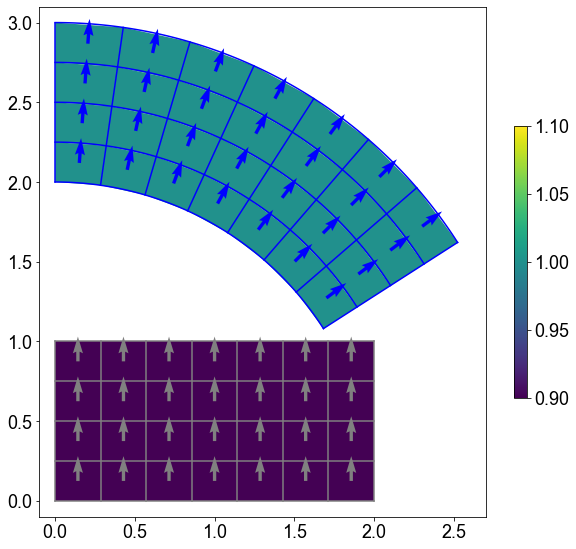

In [61]:
# creating the vector fields e_2 and f_2 = F e_2 
nlx1 = 5
nlx2 = 8
npx1 = 100
npx2 = 50
lineX1 = np.linspace(0,2,npx1)
lineX2 = np.linspace(0,1,npx2)
dx1 = 0.5*2./(nlx2-1)
dx2 = 0.5*1./(nlx1-1)
x1aux = np.linspace(dx1,2-dx1,nlx2-1)
x2aux = np.linspace(dx2,1-dx2,nlx1-1)
X1mg,X2mg = np.meshgrid(x1aux,x2aux)
# Here creating the field of e_2 
e2_1mg = np.zeros(X1mg.shape)
e2_2mg = np.ones(X1mg.shape)
# get the corresponding quiver plot in the deformed points 
x1mg = np.zeros(X1mg.shape)
x2mg = np.zeros(X1mg.shape)
f2_1mg = np.ones(X1mg.shape)
f2_2mg = np.zeros(X1mg.shape)
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi(np.array([X1mg[i,j],X2mg[i,j],0]),alpha=0.5)
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # evaluate the deformation gradient at the corresponding points 
        F = evalF(np.array([X1mg[i,j],X2mg[i,j],0]),alpha=0.5)
        # apply the deformation gradient to the vector field e1 
        f = np.dot(F,np.array([0,1,0]))
        f2_1mg[i,j] = f[0]
        f2_2mg[i,j] = f[1]

        
# plot
# Color according to change in length 
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([-0.1, 2.7])
ax.set_ylim([-0.1, 3.1])
ax.set_aspect('equal')

# Plot the same stuff I had before 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    ax.plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    ax.plot(xvec[0],xvec[1],color='blue')
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*2.0 
    ax.plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    ax.plot(xvec[0],xvec[1],color='blue')
    
# NOTE this is where I am specifying the quiver plots of e_2 and f_2
ax.quiver(X1mg,X2mg,e2_1mg,e2_2mg,color='grey',zorder=10)
ax.quiver(x1mg,x2mg,f2_1mg,f2_2mg,color='blue',zorder=10)

# Loop over grid points and create a quadrilateral for each grid point 
#viridis = matplotlib.cm.get_cmap('viridis', 50)
patchesX = []
colorsX = np.zeros(((nlx1-1)*(nlx2-1)))
patchesx = []
colorsx = np.zeros(((nlx1-1)*(nlx2-1)))
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi(np.array([X1mg[i,j],X2mg[i,j],0]),alpha=0.5)
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # but now we also want the quadrilateral around this grid point 
        quad_coord = np.array([[-1,-1],[1,-1],[1,1],[-1,1]])
        Xquad = np.zeros((4,2))
        xquad = np.zeros((4,2))
        for k in range(4):
            Xquad[k,0] = X1mg[i,j] +quad_coord[k,0]*dx1
            Xquad[k,1] = X2mg[i,j] +quad_coord[k,1]*dx2
            aux = Phi(np.array([Xquad[k,0],Xquad[k,1],0]),alpha=0.5)
            xquad[k,0] = aux[0]
            xquad[k,1] = aux[1]
        polygon = Polygon(Xquad, closed=True)
        patchesX.append(polygon)
        colorsX[i*X1mg.shape[1]+j] = 0.
        polygon = Polygon(xquad, closed=True)
        patchesx.append(polygon)
        # NOTE, here do contour plot with respect to the norm of f_2 = F e_2
        # color the quad according to the length change of f_2 
        fnorm = np.sqrt(f2_1mg[i,j]**2 + f2_2mg[i,j]**2)
        colorsx[i*X1mg.shape[1]+j] = fnorm
pX = PatchCollection(patchesX)
pX.set_array(colorsX)
ax.add_collection(pX)
px = PatchCollection(patchesx)
px.set_array(colorsx)
ax.add_collection(px)
plt.colorbar(px,ax=ax,shrink=0.5)

What! The deformation definitely affects the vectors that are originally in the $\mathbf{e}_2$ direction, it rotates them, but it doesn't change their length! That makes sense because the bending is along the other axis!

### Changes in area 

Nansons formula can be used to calculate changes in area as follows 

$
\frac{da}{dA} = |J \mathbf{F}^{-T}\mathbf{N}|
$ 

where $J=\det(\mathbf{F})$ and $\mathbf{N}$ is a unit normal vector that defines a plane at a location $\mathbf{X}$ for which I want to know the change in area. In this case, the normal that we will choose is $\mathbf{N} = \mathbf{e}_3$ which basically means we are asking for local changes in area of our quadrilaterals in the plane XY. Again, the changes in length, area and volume associated with $\mathbf{F}$ are only local, within a small neighborhood around a point $\mathbf{X}$, but it helps to use these quadrilaterals in the plots to get a more intuitive idea of what $\mathbf{F}$ is doing. 




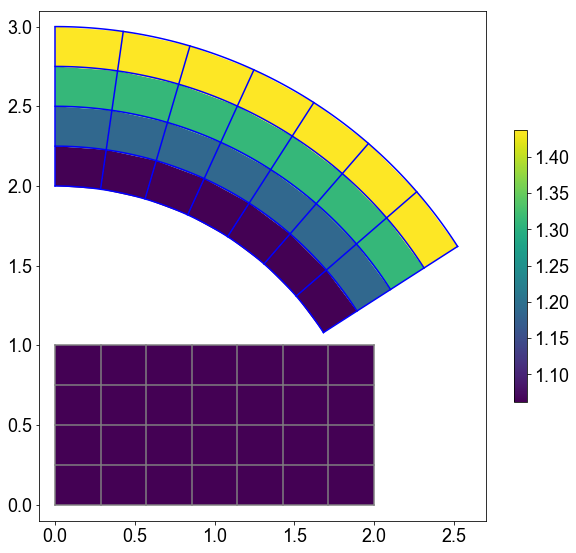

In [60]:
# Color according to change in area
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([-0.1, 2.7])
ax.set_ylim([-0.1, 3.1])
ax.set_aspect('equal')

# Plot the same stuff I had before 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    ax.plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    ax.plot(xvec[0],xvec[1],color='blue')
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*2.0 
    ax.plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    ax.plot(xvec[0],xvec[1],color='blue')


# Loop over grid points and create a quadrilateral for each grid point 
#viridis = matplotlib.cm.get_cmap('viridis', 50)
patchesX = []
colorsX = np.zeros(((nlx1-1)*(nlx2-1)))
patchesx = []
colorsx = np.zeros(((nlx1-1)*(nlx2-1)))
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi(np.array([X1mg[i,j],X2mg[i,j],0]),alpha=0.5)
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # but now we also want the quadrilateral around this grid point 
        quad_coord = np.array([[-1,-1],[1,-1],[1,1],[-1,1]])
        Xquad = np.zeros((4,2))
        xquad = np.zeros((4,2))
        for k in range(4):
            Xquad[k,0] = X1mg[i,j] +quad_coord[k,0]*dx1
            Xquad[k,1] = X2mg[i,j] +quad_coord[k,1]*dx2
            aux = Phi(np.array([Xquad[k,0],Xquad[k,1],0]),alpha=0.5)
            xquad[k,0] = aux[0]
            xquad[k,1] = aux[1]
        polygon = Polygon(Xquad, closed=True)
        patchesX.append(polygon)
        colorsX[i*X1mg.shape[1]+j] = 0.
        polygon = Polygon(xquad, closed=True)
        patchesx.append(polygon)
        
        
        ## CHANGES IN AREA ##
        # eval F at the center of the quadrilateral 
        F = evalF(np.array([X1mg[i,j],X2mg[i,j],0]),alpha=0.5)
        # compute jacobian and inverse 
        J = np.linalg.det(F)
        Finv = np.linalg.inv(F)
        # normal vector for the quadrilaterals is e3 
        N = np.array([0,0,1])
        # compute the change in area as |J*F^{-T}*N|
        dadA = np.linalg.norm(J*np.dot(Finv.transpose(),N))
        colorsx[i*X1mg.shape[1]+j] = dadA
pX = PatchCollection(patchesX)
pX.set_array(colorsX)
ax.add_collection(pX)
px = PatchCollection(patchesx)
px.set_array(colorsx)
ax.add_collection(px)
plt.colorbar(px,ax=ax,shrink=0.5)

What! This contour plot looks suspiciously just like the one about changes in length for the vectors that were initially in the $\mathbf{e}_1$ direction. Why is that? Well, if you did the activity with $\mathbf{e}_2$ you would have seen that the direction $\mathbf{e}_2$ is actually not changing in length with the deformation. The bending is stretching vectors originally in the $\mathbf{e}_1$ direction but only rotating vectors originally in the $\mathbf{e}_2$ direction. Correspondingly, the changes in area are just the same as the changes in length in this example.

### Changes in volume 

Last one, simply plot the det(F) for every grid  point 

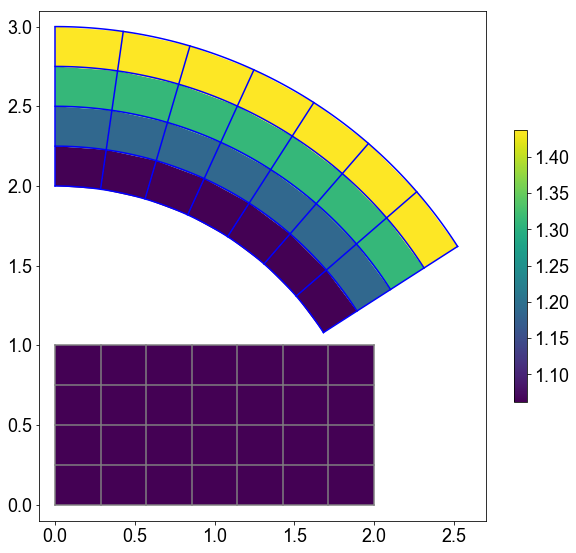

In [61]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([-0.1, 2.7])
ax.set_ylim([-0.1, 3.1])
ax.set_aspect('equal')

# Plot the same stuff I had before 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    ax.plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    ax.plot(xvec[0],xvec[1],color='blue')
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*2.0 
    ax.plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi(Xvec,alpha=0.5)
    ax.plot(xvec[0],xvec[1],color='blue')


# Loop over grid points and create a quadrilateral for each grid point 
#viridis = matplotlib.cm.get_cmap('viridis', 50)
patchesX = []
colorsX = np.zeros(((nlx1-1)*(nlx2-1)))
patchesx = []
colorsx = np.zeros(((nlx1-1)*(nlx2-1)))
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi(np.array([X1mg[i,j],X2mg[i,j],0]),alpha=0.5)
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # but now we also want the quadrilateral around this grid point 
        quad_coord = np.array([[-1,-1],[1,-1],[1,1],[-1,1]])
        Xquad = np.zeros((4,2))
        xquad = np.zeros((4,2))
        for k in range(4):
            Xquad[k,0] = X1mg[i,j] +quad_coord[k,0]*dx1
            Xquad[k,1] = X2mg[i,j] +quad_coord[k,1]*dx2
            aux = Phi(np.array([Xquad[k,0],Xquad[k,1],0]),alpha=0.5)
            xquad[k,0] = aux[0]
            xquad[k,1] = aux[1]
        polygon = Polygon(Xquad, closed=True)
        patchesX.append(polygon)
        colorsX[i*X1mg.shape[1]+j] = 0.
        polygon = Polygon(xquad, closed=True)
        patchesx.append(polygon)
        
        
        ## CHANGES IN VOLUME ##
        # eval F at the center of the quadrilateral 
        F = evalF(np.array([X1mg[i,j],X2mg[i,j],0]),alpha=0.5)
        # compute jacobian and inverse 
        J = np.linalg.det(F)
        colorsx[i*X1mg.shape[1]+j] = J
pX = PatchCollection(patchesX)
pX.set_array(colorsX)
ax.add_collection(pX)
px = PatchCollection(patchesx)
px.set_array(colorsx)
ax.add_collection(px)
plt.colorbar(px,ax=ax,shrink=0.5)

### Remarks 


As you have probably noticed by now, the deformation that I picked is very special, it is a pure bending deformation. The vectors in the direction $\mathbf{e}_1$ get stretcjhed, while the vectors in the direction $\mathbf{e}_2$ get rotated but not stretch, and nothing happens to the $\mathbf{e}_3$ vectors. Then, the change in area on the XY plane at any point $\mathbf{X}$ is the same as the change in length of $\mathbf{e}_1$ precisely because vectors in the $\mathbf{e}_2$ just get rotated but not stretched with the deformation. Note that the XY plane is defined by the normal  $\mathbf{e}_3$. Finally, the change in volume is the same as the change in area in the XY plane because nothing happens in the out of plane direction, and same as the change in length of vectors in the direction $\mathbf{e}_1$. Just some fun deformation :) 



### Activity 

* Compute the deformation gradient and changes in length and area for the other two examples in the previous activity of this notebook 

For the first example recall $\varphi(\mathbf{X}) - \mathbf{Q}\mathbf{X}+\mathbf{P}$ from which the deformation gradient is just

$$
\mathbf{F} = \mathbf{Q}
$$

That is, the only thing that is happening to vectors in the reference configuration is that they are being rotated but not stretched. We can plot the changes in length just as before: 

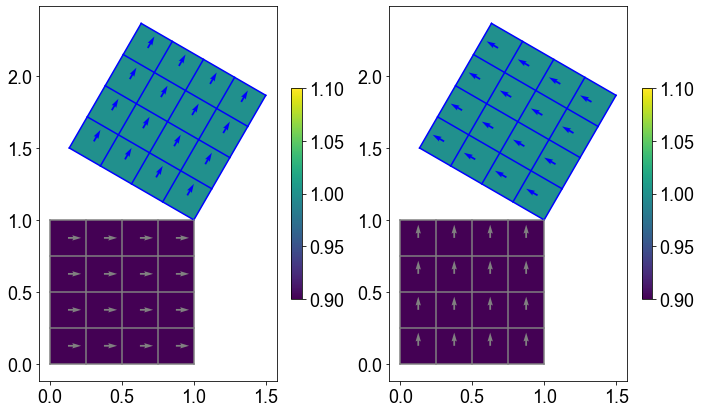

In [73]:
## FUNCTION FOR DEFORMATION GRADIENT (just the rotation tensor)
def computeF_example1(X):
    theta = np.pi/3
    e3 = np.array([0,0,1])
    Q = np.cos(theta)*np.eye(3)+np.sin(theta)*hodge_star(e3)+(1-np.cos(theta))*np.outer(e3,e3)
    return Q

# reminder this was the function for deformation map
def Phi_example_1(X):
    # defining the rotation tensor with the definition above 
    theta = np.pi/3
    e3 = np.array([0,0,1])
    Q = np.cos(theta)*np.eye(3)+np.sin(theta)*hodge_star(e3)+(1-np.cos(theta))*np.outer(e3,e3)
    P = np.array([1,1,0])
    x = np.zeros(X.shape)
    if len(x.shape)>1:
        for i in range(x.shape[1]):
            x[:,i] = np.dot(Q,X[:,i])+P
    else:
        x = np.dot(Q,X)+P
    return x

# creating the vector fields e_2 and f_2 = F e_2 
nlx1 = 5
nlx2 = 5
npx1 = 50
npx2 = 50
lineX1 = np.linspace(0,1,npx1)
lineX2 = np.linspace(0,1,npx2)
dx1 = 0.5*1./(nlx2-1)
dx2 = 0.5*1./(nlx1-1)
x1aux = np.linspace(dx1,1-dx1,nlx2-1)
x2aux = np.linspace(dx2,1-dx2,nlx1-1)
X1mg,X2mg = np.meshgrid(x1aux,x2aux)
# Creating the field of e_1
e1_1mg = np.ones(X1mg.shape)
e1_2mg = np.zeros(X1mg.shape)
# and for e_2
e2_1mg = np.zeros(X1mg.shape)
e2_2mg = np.ones(X1mg.shape)
# get the corresponding quiver plot in the deformed points 
x1mg = np.zeros(X1mg.shape)
x2mg = np.zeros(X1mg.shape)
# the corresponding deformed vector fields, just empty 
f1_1mg = np.zeros(X1mg.shape)
f1_2mg = np.zeros(X1mg.shape)
f2_1mg = np.zeros(X1mg.shape)
f2_2mg = np.zeros(X1mg.shape)
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi_example_1(np.array([X1mg[i,j],X2mg[i,j],0]))
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # evaluate the deformation gradient at the corresponding points 
        F = computeF_example1(np.array([X1mg[i,j],X2mg[i,j],0]))
        # apply the deformation gradient to the vector field e1 
        f1 = np.dot(F,np.array([1,0,0]))
        f1_1mg[i,j] = f1[0]
        f1_2mg[i,j] = f1[1]
        # apply the deformation gradient to the vector field e2
        f2 = np.dot(F,np.array([0,1,0]))
        f2_1mg[i,j] = f2[0]
        f2_2mg[i,j] = f2[1]

# plot
# Color according to change in length 
fig, ax = plt.subplots(1,2,figsize=(10,20))
#ax.set_xlim([-0.1, 3.7])
#ax.set_ylim([-0.1, 3.1])
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

# Plot the same stuff I had before 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    ax[0].plot(lineX1,X2i*np.ones(npx1),color='grey')
    ax[1].plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi_example_1(Xvec)
    ax[0].plot(xvec[0],xvec[1],color='blue')
    ax[1].plot(xvec[0],xvec[1],color='blue')
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*1.0 
    ax[0].plot(X1i*np.ones(npx2),lineX2,color='grey')
    ax[1].plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi_example_1(Xvec)
    ax[0].plot(xvec[0],xvec[1],color='blue')
    ax[1].plot(xvec[0],xvec[1],color='blue')
    
# NOTE different quivers for subplots 
ax[0].quiver(X1mg,X2mg,e1_1mg,e1_2mg,color='grey',zorder=10)
ax[0].quiver(x1mg,x2mg,f1_1mg,f1_2mg,color='blue',zorder=10)
ax[1].quiver(X1mg,X2mg,e2_1mg,e2_2mg,color='grey',zorder=10)
ax[1].quiver(x1mg,x2mg,f2_1mg,f2_2mg,color='blue',zorder=10)

# Loop over grid points and create a quadrilateral for each grid point 
#viridis = matplotlib.cm.get_cmap('viridis', 50)
patchesX1 = []
colorsX1 = np.zeros(((nlx1-1)*(nlx2-1)))
patchesx1 = []
colorsx1 = np.zeros(((nlx1-1)*(nlx2-1)))
patchesX2 = []
colorsX2 = np.zeros(((nlx1-1)*(nlx2-1)))
patchesx2 = []
colorsx2 = np.zeros(((nlx1-1)*(nlx2-1)))
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi_example_1(np.array([X1mg[i,j],X2mg[i,j],0]))
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # but now we also want the quadrilateral around this grid point 
        quad_coord = np.array([[-1,-1],[1,-1],[1,1],[-1,1]])
        Xquad = np.zeros((4,2))
        xquad = np.zeros((4,2))
        for k in range(4):
            Xquad[k,0] = X1mg[i,j] +quad_coord[k,0]*dx1
            Xquad[k,1] = X2mg[i,j] +quad_coord[k,1]*dx2
            aux = Phi_example_1(np.array([Xquad[k,0],Xquad[k,1],0]))
            xquad[k,0] = aux[0]
            xquad[k,1] = aux[1]
        polygon = Polygon(Xquad, closed=True)
        patchesX1.append(polygon)
        patchesX2.append(polygon)
        colorsX1[i*X1mg.shape[1]+j] = 0.
        colorsX2[i*X1mg.shape[1]+j] = 0.
        polygon = Polygon(xquad, closed=True)
        patchesx1.append(polygon)
        patchesx2.append(polygon)
        # NOTE
        # color the quad according to the length change of f_1 or f_2 depending on subplot
        f1norm = np.sqrt(f1_1mg[i,j]**2 + f1_2mg[i,j]**2)
        f2norm = np.sqrt(f2_1mg[i,j]**2 + f2_2mg[i,j]**2)
        colorsx1[i*X1mg.shape[1]+j] = f1norm
        colorsx2[i*X1mg.shape[1]+j] = f2norm
pX1 = PatchCollection(patchesX1)
pX1.set_array(colorsX1)
ax[0].add_collection(pX1)
px1 = PatchCollection(patchesx1)
px1.set_array(colorsx1)
ax[0].add_collection(px1)
plt.colorbar(px1,ax=ax[0],shrink=0.15)
#
pX2 = PatchCollection(patchesX2)
pX2.set_array(colorsX2)
ax[1].add_collection(pX2)
px2 = PatchCollection(patchesx2)
px2.set_array(colorsx2)
ax[1].add_collection(px2)
plt.colorbar(px2,ax=ax[1],shrink=0.15)
plt.tight_layout()

Note that there is no length change for either vectors originally in $\mathbf{e}_1$ or vectors originally in $\mathbf{e}_2$ direction. I wont compute the area or volume changes because you can probably guess already that there is no area change for this case either. The type of deformation associated with the example is a rigid body motion, i.e. no deformation. 

The second deformation was:

$$
\begin{aligned}
x_1 &= (1+\alpha) X_1\\
x_2 &= (X_2 - 0.5)(1+X_1^2)+0.5\\
x_3 &= X_3 \\
\end{aligned}
$$

The deformation gradient in this case is 

$$
\mathbf{F} = \begin{bmatrix}1+\alpha & 0 &0\\(X_2-0.5)(2X_1) & (1+X_1^2) & 0\\0&0&1\end{bmatrix}
$$


One step further, we can compute the right Cauchy Green deformation tensor $\mathbf{C}=\mathbf{F}^T\mathbf{F}$, it becomes more involved so instead of doing by hand here I show how to do using the package Sympy for symbolic math in python: 

In [93]:
## If you want to use a symbolic package for derivatives and matrix operations instead of doing by hand here is a
# demo of sympy 
import sympy as sp 
from sympy import init_printing
init_printing(use_latex='mathjax')
from sympy import pprint
X1,X2,X3,alpha = sp.symbols('X1 X2 X3 a')
x1 = (1+alpha)*X1
x2 = (X2-0.5)*(1+X1**2)+0.5
x3 = X3
F = np.array([[sp.diff(x1,X1),sp.diff(x1,X2),sp.diff(x1,X3)],\
             [sp.diff(x2,X1),sp.diff(x2,X2),sp.diff(x2,X3)],\
             [sp.diff(x3,X1),sp.diff(x3,X2),sp.diff(x3,X3)]])
print('deformation gradient with sympy')
print(F)

# compute right Cauchy Green
C = np.dot(F.transpose(),F)
print('right Cauchy Green deformation tensor with sympy')
print(C)

deformation gradient with sympy
[[a + 1 0 0]
 [2*X1*(X2 - 0.5) X1**2 + 1 0]
 [0 0 1]]
right Cauchy Green deformation tensor with sympy
[[4*X1**2*(X2 - 0.5)**2 + (a + 1)**2 2*X1*(X1**2 + 1)*(X2 - 0.5) 0]
 [2*X1*(X1**2 + 1)*(X2 - 0.5) (X1**2 + 1)**2 0]
 [0 0 1]]


In [78]:
# second example
def Phi_example_2(X):
    # defining the rotation tensor with the definition above 
    x = np.zeros(X.shape)
    if len(X.shape)>1:
        x[0,:] = 1.5*X[0,:]
        x[1,:] = (X[1,:]-0.5)*(1+X[0,:]**2)+0.5
        x[2,:] = X[2,:]
    else:
        x[0] = 1.5*X[0]
        x[1] = (X[1]-0.5)*(1+X[0]**2)+0.5
        x[2] = X[2]
    return x

def computeF_example2(X):
    alpha = 0.5
    return np.array([[1+alpha,0,0],[(X[1]-0.5)*(2*X[0]),1+X[0]**2,0],[0,0,1]])



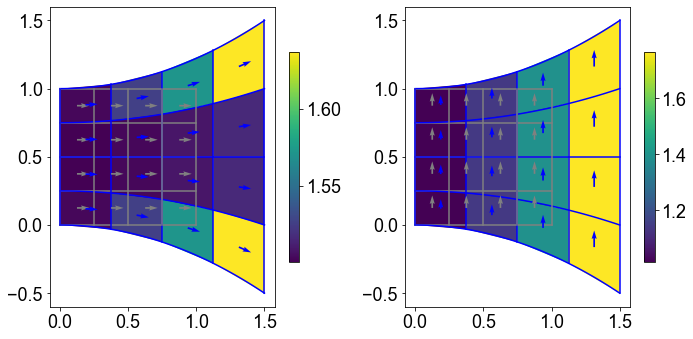

In [80]:
# creating the vector fields e_2 and f_2 = F e_2 
nlx1 = 5
nlx2 = 5
npx1 = 50
npx2 = 50
lineX1 = np.linspace(0,1,npx1)
lineX2 = np.linspace(0,1,npx2)
dx1 = 0.5*1./(nlx2-1)
dx2 = 0.5*1./(nlx1-1)
x1aux = np.linspace(dx1,1-dx1,nlx2-1)
x2aux = np.linspace(dx2,1-dx2,nlx1-1)
X1mg,X2mg = np.meshgrid(x1aux,x2aux)
# Creating the field of e_1
e1_1mg = np.ones(X1mg.shape)
e1_2mg = np.zeros(X1mg.shape)
# and for e_2
e2_1mg = np.zeros(X1mg.shape)
e2_2mg = np.ones(X1mg.shape)
# get the corresponding quiver plot in the deformed points 
x1mg = np.zeros(X1mg.shape)
x2mg = np.zeros(X1mg.shape)
# the corresponding deformed vector fields, just empty 
f1_1mg = np.zeros(X1mg.shape)
f1_2mg = np.zeros(X1mg.shape)
f2_1mg = np.zeros(X1mg.shape)
f2_2mg = np.zeros(X1mg.shape)
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi_example_2(np.array([X1mg[i,j],X2mg[i,j],0]))
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # evaluate the deformation gradient at the corresponding points 
        F = computeF_example2(np.array([X1mg[i,j],X2mg[i,j],0]))
        # apply the deformation gradient to the vector field e1 
        f1 = np.dot(F,np.array([1,0,0]))
        f1_1mg[i,j] = f1[0]
        f1_2mg[i,j] = f1[1]
        # apply the deformation gradient to the vector field e2
        f2 = np.dot(F,np.array([0,1,0]))
        f2_1mg[i,j] = f2[0]
        f2_2mg[i,j] = f2[1]

# plot
# Color according to change in length 
fig, ax = plt.subplots(1,2,figsize=(10,20))
#ax.set_xlim([-0.1, 3.7])
#ax.set_ylim([-0.1, 3.1])
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

# Plot the same stuff I had before 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    ax[0].plot(lineX1,X2i*np.ones(npx1),color='grey')
    ax[1].plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi_example_2(Xvec)
    ax[0].plot(xvec[0],xvec[1],color='blue')
    ax[1].plot(xvec[0],xvec[1],color='blue')
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*1.0 
    ax[0].plot(X1i*np.ones(npx2),lineX2,color='grey')
    ax[1].plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi_example_2(Xvec)
    ax[0].plot(xvec[0],xvec[1],color='blue')
    ax[1].plot(xvec[0],xvec[1],color='blue')
    
# NOTE different quivers for subplots 
ax[0].quiver(X1mg,X2mg,e1_1mg,e1_2mg,color='grey',zorder=10)
ax[0].quiver(x1mg,x2mg,f1_1mg,f1_2mg,color='blue',zorder=10)
ax[1].quiver(X1mg,X2mg,e2_1mg,e2_2mg,color='grey',zorder=10)
ax[1].quiver(x1mg,x2mg,f2_1mg,f2_2mg,color='blue',zorder=10)

# Loop over grid points and create a quadrilateral for each grid point 
#viridis = matplotlib.cm.get_cmap('viridis', 50)
patchesX1 = []
colorsX1 = np.zeros(((nlx1-1)*(nlx2-1)))
patchesx1 = []
colorsx1 = np.zeros(((nlx1-1)*(nlx2-1)))
patchesX2 = []
colorsX2 = np.zeros(((nlx1-1)*(nlx2-1)))
patchesx2 = []
colorsx2 = np.zeros(((nlx1-1)*(nlx2-1)))
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi_example_2(np.array([X1mg[i,j],X2mg[i,j],0]))
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # but now we also want the quadrilateral around this grid point 
        quad_coord = np.array([[-1,-1],[1,-1],[1,1],[-1,1]])
        Xquad = np.zeros((4,2))
        xquad = np.zeros((4,2))
        for k in range(4):
            Xquad[k,0] = X1mg[i,j] +quad_coord[k,0]*dx1
            Xquad[k,1] = X2mg[i,j] +quad_coord[k,1]*dx2
            aux = Phi_example_2(np.array([Xquad[k,0],Xquad[k,1],0]))
            xquad[k,0] = aux[0]
            xquad[k,1] = aux[1]
        polygon = Polygon(Xquad, closed=True)
        patchesX1.append(polygon)
        patchesX2.append(polygon)
        colorsX1[i*X1mg.shape[1]+j] = 0.
        colorsX2[i*X1mg.shape[1]+j] = 0.
        polygon = Polygon(xquad, closed=True)
        patchesx1.append(polygon)
        patchesx2.append(polygon)
        # NOTE
        # color the quad according to the length change of f_1 or f_2 depending on subplot
        f1norm = np.sqrt(f1_1mg[i,j]**2 + f1_2mg[i,j]**2)
        f2norm = np.sqrt(f2_1mg[i,j]**2 + f2_2mg[i,j]**2)
        colorsx1[i*X1mg.shape[1]+j] = f1norm
        colorsx2[i*X1mg.shape[1]+j] = f2norm
pX1 = PatchCollection(patchesX1)
pX1.set_array(colorsX1)
ax[0].add_collection(pX1)
px1 = PatchCollection(patchesx1)
px1.set_array(colorsx1)
ax[0].add_collection(px1)
plt.colorbar(px1,ax=ax[0],shrink=0.15)
#
pX2 = PatchCollection(patchesX2)
pX2.set_array(colorsX2)
ax[1].add_collection(pX2)
px2 = PatchCollection(patchesx2)
px2.set_array(colorsx2)
ax[1].add_collection(px2)
plt.colorbar(px2,ax=ax[1],shrink=0.15)
plt.tight_layout()

Note how in this case the deformation is a bit more complicated and in fact note that the contour plots corresponds to the entries of the tensor $\mathbf{C}$. In particular, the first contour plot, changes in length for vectors originally in $\mathbf{e}_1$, is the same as the entry $C_{11}$. The contour for changes in length for vectors initially in direction $\mathbf{e}_2$ is the entry $C_{22}$ of the right Cauchy Green deformation tensor obtained above. 